# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [654]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [655]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements1.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1.25mCops_4t\AA\run_measurements1.csv


In [656]:
filepath = os.path.join(cwd, "Results" , "1.25mCops_4t", "AA", "run_measurements2.csv")
df2 = pd.read_csv(filepath)

In [657]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results" , "1.25mCops_4t", "AA", "run_measurements3.csv")
print(filepath)
df3 = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1.25mCops_4t\AA\run_measurements3.csv


In [658]:
dfConcat = pd.concat([df, df2, df3], ignore_index=True)
firstSent = dfConcat["sent"].min()
dfConcat["sent_sec"] = (dfConcat["sent"] - firstSent)/1000000/1000
dfConcat = dfConcat.loc[(dfConcat["sent_sec"] > 200) & (dfConcat["sent_sec"] < 800)]

dfConcat["latency_ms"] = (dfConcat["received"]- dfConcat["sent"])/1000000
dfConcatA = dfConcat.loc[(dfConcat["workerId"] == "w1-vA") | (dfConcat["workerId"] == "w2-vA") | (dfConcat["workerId"] == "w3-vA")]
dfConcatB = dfConcat.loc[(dfConcat["workerId"] == "w1-vB") | (dfConcat["workerId"] == "w2-vB") | (dfConcat["workerId"] == "w3-vB")]

dfConcatARead=dfConcatA.loc[(dfConcat["queryType"] == "SELECT")]
dfConcatAUpdate=dfConcatA.loc[(dfConcat["queryType"] == "UPDATE")]
dfConcatBRead=dfConcatB.loc[(dfConcat["queryType"] == "SELECT")]
dfConcatBUpdate=dfConcatB.loc[(dfConcat["queryType"] == "UPDATE")]

In [659]:
dfConcatAUpdate.describe()

,queryId,sent,received,sent_sec,latency_ms
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [660]:
dfConcatBUpdate.describe()

,queryId,sent,received,sent_sec,latency_ms
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [661]:
dfConcatARead.describe()

,queryId,sent,received,sent_sec,latency_ms
count,1.621500e+06,1.621500e+06,1.621500e+06,1.621500e+06,1.621500e+06
mean,5.934598e+05,2.986108e+12,2.986119e+12,5.372583e+02,1.092235e+01
std,3.548015e+05,1.694968e+11,1.694963e+11,1.694968e+02,2.748030e+01
min,0.000000e+00,2.648850e+12,2.648852e+12,2.000004e+02,5.795060e-01
25%,3.128078e+05,2.844998e+12,2.845004e+12,3.961486e+02,1.345720e+00
50%,5.444875e+05,3.015045e+12,3.015055e+12,5.661955e+02,2.150627e+00
75%,9.379822e+05,3.127792e+12,3.127800e+12,6.789422e+02,4.679102e+00
max,1.172002e+06,3.248849e+12,3.248997e+12,7.999997e+02,1.700572e+03


In [662]:
dfConcatBRead.describe()

,queryId,sent,received,sent_sec,latency_ms
count,1.643105e+06,1.643105e+06,1.643105e+06,1.643105e+06,1.643105e+06
mean,5.840755e+05,2.988499e+12,2.988510e+12,5.396493e+02,1.077888e+01
std,3.539278e+05,1.677959e+11,1.677953e+11,1.677959e+02,2.698975e+01
min,0.000000e+00,2.648850e+12,2.648851e+12,2.000002e+02,5.815360e-01
25%,3.133120e+05,2.850251e+12,2.850256e+12,4.014015e+02,1.366731e+00
50%,5.380030e+05,3.021970e+12,3.021985e+12,5.731207e+02,2.198802e+00
75%,8.489950e+05,3.125650e+12,3.125672e+12,6.768004e+02,4.759924e+00
max,1.161256e+06,3.248849e+12,3.249006e+12,7.999998e+02,4.967529e+02


### Set Versions as Variables

In [663]:
workloadLoad = "Workload C: 100% Insert"
workloadRun = "Workload C: 100% Read"
phase = "Run"
versionA = "Version A: Cassandra 4.0.4"
versionB = "Version B: Cassandra 3.0.27"

### Insert latencies in ms into the measurement table

In [664]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [665]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [666]:
df.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,6.249995e+05,3.037997e+12,3.038007e+12,1.070054e+01,3.037997e+06,3.038007e+06
std,3.608440e+05,3.188935e+11,3.188925e+11,2.722367e+01,3.188935e+05,3.188925e+05
min,0.000000e+00,2.448850e+12,2.448969e+12,5.793710e-01,2.448850e+06,2.448969e+06
25%,3.124998e+05,2.763444e+12,2.763460e+12,1.312894e+00,2.763444e+06,2.763460e+06
50%,6.249995e+05,3.045133e+12,3.045207e+12,2.043794e+00,3.045133e+06,3.045207e+06
75%,9.374992e+05,3.315270e+12,3.315278e+12,4.265070e+00,3.315270e+06,3.315278e+06
max,1.249999e+06,3.591150e+12,3.591151e+12,1.700572e+03,3.591150e+06,3.591151e+06


In [667]:
df = df.sort_values(by="sent", ascending=True)
df.head()

,workerId,queryType,queryId,sent,received,target-region,latency_ms,sent_ms,received_ms
5,w1-vA,SELECT,0,2448849501240,2448978176373,unknown,128.675133,2.448850e+06,2.448978e+06
2,w1-vA,SELECT,312501,2448849793456,2448969465580,unknown,119.672124,2.448850e+06,2.448969e+06
0,w1-vB,SELECT,0,2448850072860,2448968846153,unknown,118.773293,2.448850e+06,2.448969e+06
7,w1-vB,SELECT,625002,2448850359744,2448992750030,unknown,142.390286,2.448850e+06,2.448993e+06
4,w1-vA,SELECT,625002,2448850513656,2448976359885,unknown,125.846229,2.448851e+06,2.448976e+06


### Restructure Timeline

In [668]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Return benchmark run time (First request send to last response received)

In [669]:
totalTime = df["sent"].max() - df["sent"].min()
print(totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "m") 


1142.300134656 seconds or 19.038335577599998 m


### Prune Measurements and print new run time for pruned benchmark (Remove first and last 100 seconds)

In [670]:
# < (totalTime/1000000/1000) <
dfPruned = df.loc[(df["sent_sec"] > 200) & (df["sent_sec"] < 600)]

In [671]:
totalTime = dfPruned["sent"].max() - dfPruned["sent"].min()
print("Pruned time:\n",totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "minutes") 

Pruned time:
 399.999222948 seconds or 6.6666537158 minutes


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [672]:
dfARaw=df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfBRaw=df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]
dfA1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vA")]
dfA2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vA")]
dfA3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vA")]
dfB1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vB")]
dfB2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vB")]
dfB3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vB")]
dfA = dfPruned.loc[(dfPruned["workerId"] == "w1-vA") | (dfPruned["workerId"] == "w2-vA") | (dfPruned["workerId"] == "w3-vA")]
dfB = dfPruned.loc[(dfPruned["workerId"] == "w1-vB") | (dfPruned["workerId"] == "w2-vB") | (dfPruned["workerId"] == "w3-vB")]
dfARaw = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfBRaw = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]
dfR1 = df.loc[(df["target-region"] == "europe-west1")]
dfR2 = df.loc[(df["target-region"] == "europe-west2")]
dfR3 = df.loc[(df["target-region"] == "europe-west3")]
dfAr1Raw=dfARaw.loc[(df["target-region"] == "europe-west1")]
dfBr1Raw=dfBRaw.loc[(df["target-region"] == "europe-west1")]
dfAr2Raw=dfARaw.loc[(df["target-region"] == "europe-west2")]
dfBr2Raw=dfBRaw.loc[(df["target-region"] == "europe-west2")]
dfAr3Raw=dfARaw.loc[(df["target-region"] == "europe-west3")]
dfBr3Raw=dfBRaw.loc[(df["target-region"] == "europe-west3")]
dfAUpdate = dfA.loc[(dfA["queryType"] == "UPDATE")]
dfBUpdate = dfB.loc[(dfB["queryType"] == "UPDATE")]
dfARead = dfA.loc[(dfA["queryType"] == "SELECT")]
dfBRead = dfB.loc[(dfB["queryType"] == "SELECT")]

In [673]:
dfAUpdate.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [674]:
dfBUpdate.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [675]:
dfARead.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,4.420820e+05,4.420820e+05,4.420820e+05,442082.000000,4.420820e+05,4.420820e+05,442082.000000
mean,5.771004e+05,2.854151e+12,2.854162e+12,10.855120,2.854151e+06,2.854162e+06,405.301911
std,3.503854e+05,1.156365e+11,1.156361e+11,27.365490,1.156365e+05,1.156361e+05,115.636549
min,5.200400e+04,2.648851e+12,2.648853e+12,0.641453,2.648851e+06,2.648853e+06,200.001646
25%,3.662372e+05,2.755353e+12,2.755365e+12,1.315714,2.755353e+06,2.755365e+06,306.503116
50%,4.781945e+05,2.855945e+12,2.855976e+12,2.067485,2.855945e+06,2.855976e+06,407.095229
75%,7.885035e+05,2.955204e+12,2.955218e+12,4.289963,2.955204e+06,2.955218e+06,506.354382
max,1.102131e+06,3.048848e+12,3.048921e+12,1700.572357,3.048848e+06,3.048921e+06,599.998635


In [676]:
dfBRead.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,4.273180e+05,4.273180e+05,4.273180e+05,427318.000000,4.273180e+05,4.273180e+05,427318.000000
mean,5.662925e+05,2.854061e+12,2.854072e+12,11.229651,2.854061e+06,2.854072e+06,405.211663
std,3.509791e+05,1.155734e+11,1.155729e+11,27.644067,1.155734e+05,1.155729e+05,115.573414
min,4.313400e+04,2.648850e+12,2.648851e+12,0.668848,2.648850e+06,2.648851e+06,200.000362
25%,3.566308e+05,2.754775e+12,2.754782e+12,1.340276,2.754775e+06,2.754782e+06,305.925650
50%,4.646375e+05,2.855615e+12,2.855635e+12,2.147279,2.855615e+06,2.855635e+06,406.765030
75%,9.815502e+05,2.955000e+12,2.955005e+12,4.590650,2.955000e+06,2.955005e+06,506.150421
max,1.089434e+06,3.048849e+12,3.048923e+12,405.675215,3.048849e+06,3.048923e+06,599.999585


In [677]:
dfARaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,6.249995e+05,3.016693e+12,3.016703e+12,1.052089e+01,3.016693e+06,3.016703e+06,5.678432e+02
std,3.608441e+05,3.131369e+11,3.131363e+11,2.704846e+01,3.131369e+05,3.131363e+05,3.131369e+02
min,0.000000e+00,2.448850e+12,2.448969e+12,6.228410e-01,2.448850e+06,2.448969e+06,0.000000e+00
25%,3.124998e+05,2.745823e+12,2.745827e+12,1.306516e+00,2.745823e+06,2.745827e+06,2.969732e+02
50%,6.249995e+05,3.023664e+12,3.023670e+12,2.017771e+00,3.023664e+06,3.023670e+06,5.748143e+02
75%,9.374992e+05,3.291205e+12,3.291213e+12,4.143419e+00,3.291205e+06,3.291213e+06,8.423560e+02
max,1.249999e+06,3.564246e+12,3.564247e+12,1.700572e+03,3.564246e+06,3.564247e+06,1.115396e+03


In [678]:
dfBRaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,6.249995e+05,3.059300e+12,3.059311e+12,1.088020e+01,3.059300e+06,3.059311e+06,6.104509e+02
std,3.608441e+05,3.231467e+11,3.231453e+11,2.739659e+01,3.231467e+05,3.231453e+05,3.231467e+02
min,0.000000e+00,2.448850e+12,2.448969e+12,5.793710e-01,2.448850e+06,2.448969e+06,5.716200e-04
25%,3.124998e+05,2.781693e+12,2.781703e+12,1.319281e+00,2.781693e+06,2.781703e+06,3.328435e+02
50%,6.249995e+05,3.067252e+12,3.067256e+12,2.071048e+00,3.067252e+06,3.067256e+06,6.184030e+02
75%,9.374992e+05,3.341684e+12,3.341705e+12,4.390800e+00,3.341684e+06,3.341705e+06,8.928344e+02
max,1.249999e+06,3.591150e+12,3.591151e+12,4.347595e+02,3.591150e+06,3.591151e+06,1.142300e+03


In [679]:
dfA.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,4.420820e+05,4.420820e+05,4.420820e+05,442082.000000,4.420820e+05,4.420820e+05,442082.000000
mean,5.771004e+05,2.854151e+12,2.854162e+12,10.855120,2.854151e+06,2.854162e+06,405.301911
std,3.503854e+05,1.156365e+11,1.156361e+11,27.365490,1.156365e+05,1.156361e+05,115.636549
min,5.200400e+04,2.648851e+12,2.648853e+12,0.641453,2.648851e+06,2.648853e+06,200.001646
25%,3.662372e+05,2.755353e+12,2.755365e+12,1.315714,2.755353e+06,2.755365e+06,306.503116
50%,4.781945e+05,2.855945e+12,2.855976e+12,2.067485,2.855945e+06,2.855976e+06,407.095229
75%,7.885035e+05,2.955204e+12,2.955218e+12,4.289963,2.955204e+06,2.955218e+06,506.354382
max,1.102131e+06,3.048848e+12,3.048921e+12,1700.572357,3.048848e+06,3.048921e+06,599.998635


In [680]:
dfB.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,4.273180e+05,4.273180e+05,4.273180e+05,427318.000000,4.273180e+05,4.273180e+05,427318.000000
mean,5.662925e+05,2.854061e+12,2.854072e+12,11.229651,2.854061e+06,2.854072e+06,405.211663
std,3.509791e+05,1.155734e+11,1.155729e+11,27.644067,1.155734e+05,1.155729e+05,115.573414
min,4.313400e+04,2.648850e+12,2.648851e+12,0.668848,2.648850e+06,2.648851e+06,200.000362
25%,3.566308e+05,2.754775e+12,2.754782e+12,1.340276,2.754775e+06,2.754782e+06,305.925650
50%,4.646375e+05,2.855615e+12,2.855635e+12,2.147279,2.855615e+06,2.855635e+06,406.765030
75%,9.815502e+05,2.955000e+12,2.955005e+12,4.590650,2.955000e+06,2.955005e+06,506.150421
max,1.089434e+06,3.048849e+12,3.048923e+12,405.675215,3.048849e+06,3.048923e+06,599.999585


### Calculate Percentiles

In [681]:
ninetyA = dfA["latency_ms"].dropna().quantile([.9])
ninetynineA = dfA["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyA, "\n99% percentile Version A --> ", ninetynineA)


90% percentile versionA -->  0.9    24.761056
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    135.6489
Name: latency_ms, dtype: float64


In [682]:
ninetyB = dfB["latency_ms"].dropna().quantile([.9])
ninetynineB = dfB["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyB, "\n99% percentile Version A --> ", ninetynineB)

90% percentile versionA -->  0.9    26.989895
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    136.202751
Name: latency_ms, dtype: float64


### Min. Latencies for Worker 2 (A & B)

In [683]:
dfA2.loc[dfA2["latency_ms"].idxmin()]

workerId                 w2-vA
queryType               SELECT
queryId                  77569
sent             2745214583310
received         2745215233650
target-region          unknown
latency_ms             0.65034
sent_ms          2745214.58331
received_ms      2745215.23365
sent_sec            296.365082
Name: 1028686, dtype: object

In [684]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                  w1-vB
queryType                SELECT
queryId                  705054
sent              2791509013494
received          2791509688682
target-region           unknown
latency_ms             0.675188
sent_ms          2791509.013494
received_ms      2791509.688682
sent_sec             342.659512
Name: 229453, dtype: object

In [685]:
df[df.received == 999999999999999999].shape[0]


0

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [686]:

dfA2["sent"].min() - dfB2["sent"].min()

25335715

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [687]:
dfA1["sent"].max() - dfB1["sent"].max() 


-575157

## Create Figures 

### Create Boxplots

In [688]:
sns.set_theme(style="darkgrid")
print(len(dfA))

442082


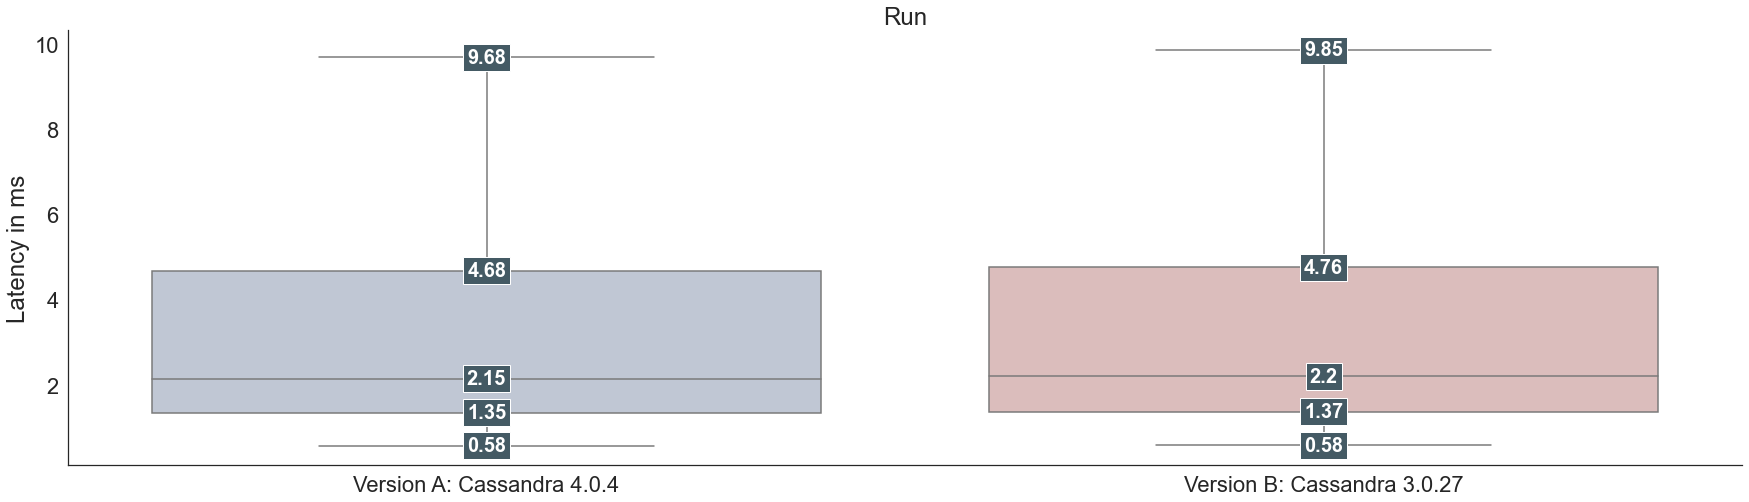

In [689]:

combined_dfs = pd.DataFrame({versionA: dfConcatARead['latency_ms'],
                             versionB: dfConcatBRead['latency_ms']})
                             
sns.set_style('white')
sns.set_context('notebook', font_scale=2.0)

box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette="vlag").set_title(phase)




ax = box_plot.axes
ax.set_ylabel("Latency in ms")
lines = ax.get_lines()

categories = ax.get_xticks()

for i in range(0,5):
    for cat in categories:

        y = round(lines[(i+cat*5)].get_ydata()[0],2) 

        ax.text(
            cat, 
            y, 
            f'{y}', 
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=20,
            color='white',
            bbox=dict(facecolor='#445A64'))


sns.despine()



In [690]:
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(30,8)})
print(len(df))

2500000


### Create Lineplot comparing latencies of Version A and B

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_3112\1781171185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartA["averaged"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_3112\1781171185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartB["averaged"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


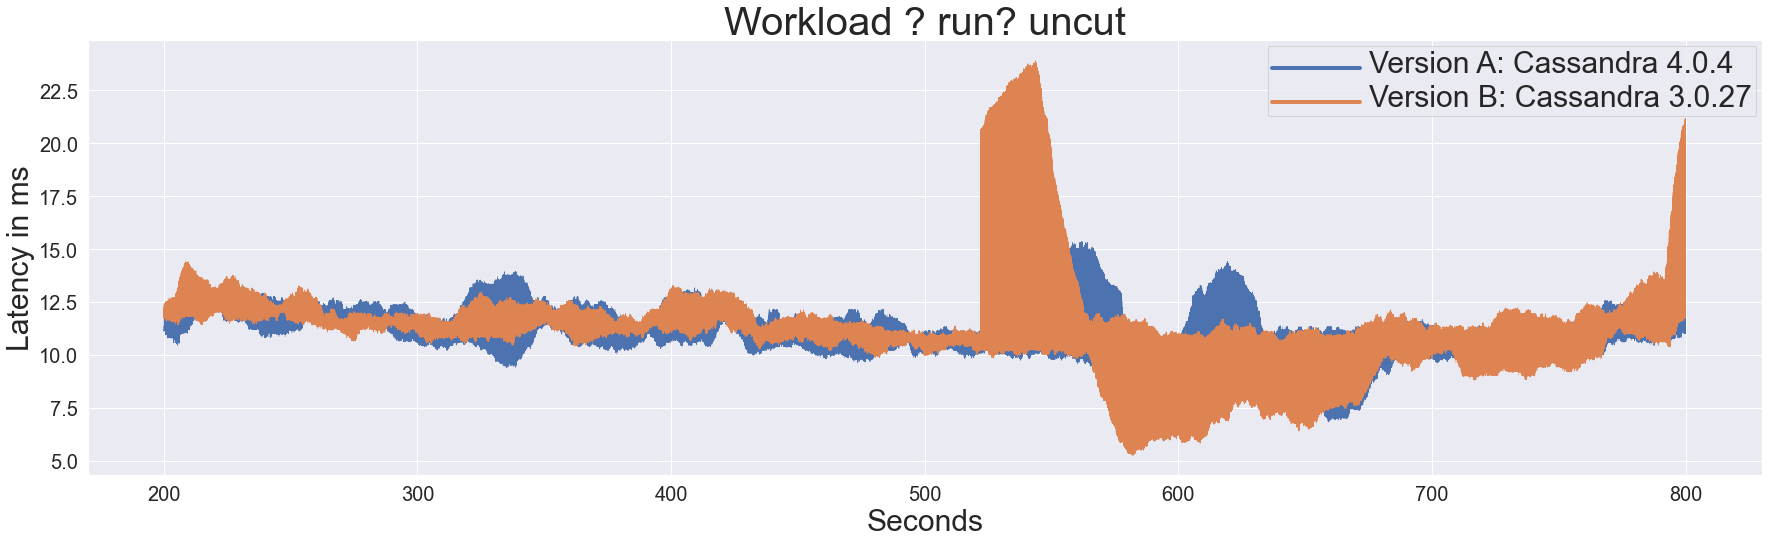

In [691]:
subchartA = (dfA[['sent_sec', 'latency_ms']])
subchartB = (dfB[['sent_sec', 'latency_ms']])

subchartA["averaged"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["averaged"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


fig, ax = plt.subplots()

title = "Workload ? run? uncut"
line1 = sns.lineplot(data=subchartA, x="sent_sec", y='averaged', linewidth=.25,label=versionA)

line2 = sns.lineplot(data=subchartB, x='sent_sec',y='averaged', linewidth=.25,label=versionB).set_title(title)

# Set x and y axis labels
ax.set_xlabel("Seconds");
ax.set_ylabel("Latency in ms");

ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontsize(20)

ax.title.set_fontsize(40)

# get the legend object
leg = ax.legend(handlelength=8)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
    

# change font size of every text in the legend
for text in leg.get_texts(): 
    text.set_fontsize(30)


plt.show()

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_3112\861292279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_3112\861292279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


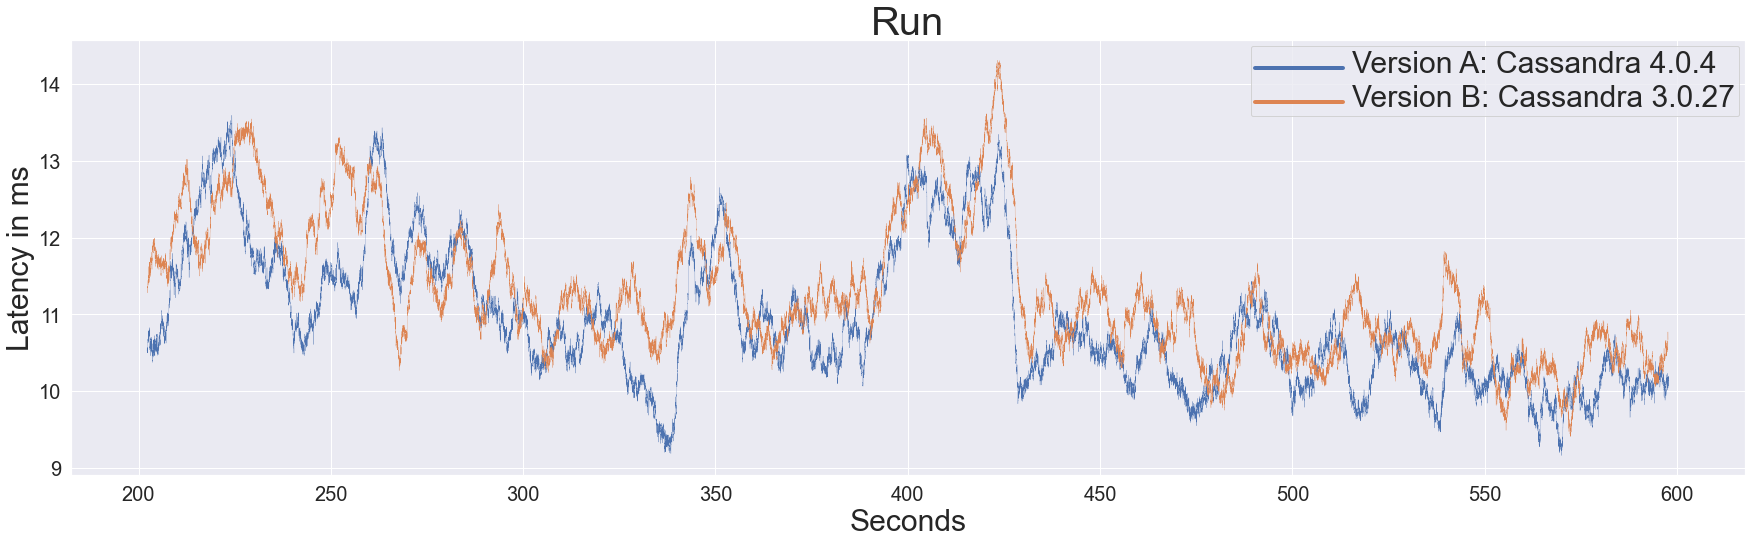

In [692]:
subchartA = dfA[['sent_sec', 'latency_ms']]
subchartB = dfB[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


fig, ax = plt.subplots()
title =  phase + " " + workloadLoad  if phase=="Cut Run" else phase
line1 = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25, label=versionA)
line2 = sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25, label=versionB).set_title(title)


# Set x and y axis labels
ax.set_xlabel("Seconds");
ax.set_ylabel("Latency in ms");

ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontsize(20)

ax.title.set_fontsize(40)

# get the legend object
leg = ax.legend(handlelength=8)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
    

# change font size of every text in the legend
for text in leg.get_texts(): 
    text.set_fontsize(30)


plt.show()

In [693]:
dfAr1Read = dfA1.loc[(dfA1["queryType"] == "SELECT")]
dfAr2Read = dfA2.loc[(dfA2["queryType"] == "SELECT")]
dfAr3Read = dfA3.loc[(dfA3["queryType"] == "SELECT")]
dfBr1Read = dfB1.loc[(dfB1["queryType"] == "SELECT")]
dfBr2Read = dfB2.loc[(dfB2["queryType"] == "SELECT")]
dfBr3Read = dfB3.loc[(dfB3["queryType"] == "SELECT")]
dfAr1Update = dfA1.loc[(dfA1["queryType"] == "UPDATE")]
dfAr2Update = dfA2.loc[(dfA2["queryType"] == "UPDATE")]
dfAr3Update = dfA3.loc[(dfA3["queryType"] == "UPDATE")]
dfBr1Update = dfB1.loc[(dfB1["queryType"] == "UPDATE")]
dfBr2Update = dfB2.loc[(dfB2["queryType"] == "UPDATE")]
dfBr3Update = dfB3.loc[(dfB3["queryType"] == "UPDATE")]

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_3112\121323808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_3112\121323808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


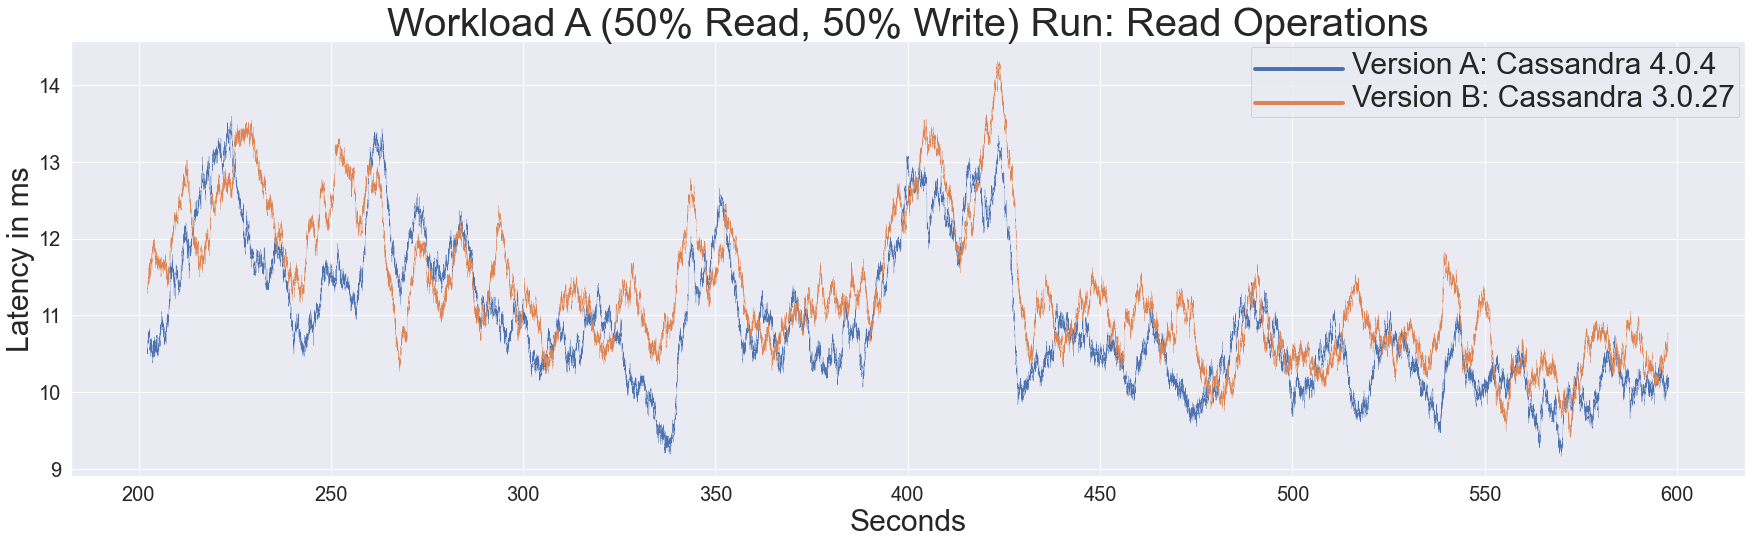

In [694]:
subchartA = dfARead[['sent_sec', 'latency_ms']]
subchartB = dfBRead[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)

fig, ax = plt.subplots()
title =  "Workload A (50% Read, 50% Write) Run: Read Operations"

line1 = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25, label=versionA)
line2 = sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25, label=versionB).set_title(title)

# Set x and y axis labels
ax.set_xlabel("Seconds");
ax.set_ylabel("Latency in ms");

ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontsize(20)

ax.title.set_fontsize(40)

# get the legend object
leg = ax.legend(handlelength=8)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
    

# change font size of every text in the legend
for text in leg.get_texts(): 
    text.set_fontsize(30)


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


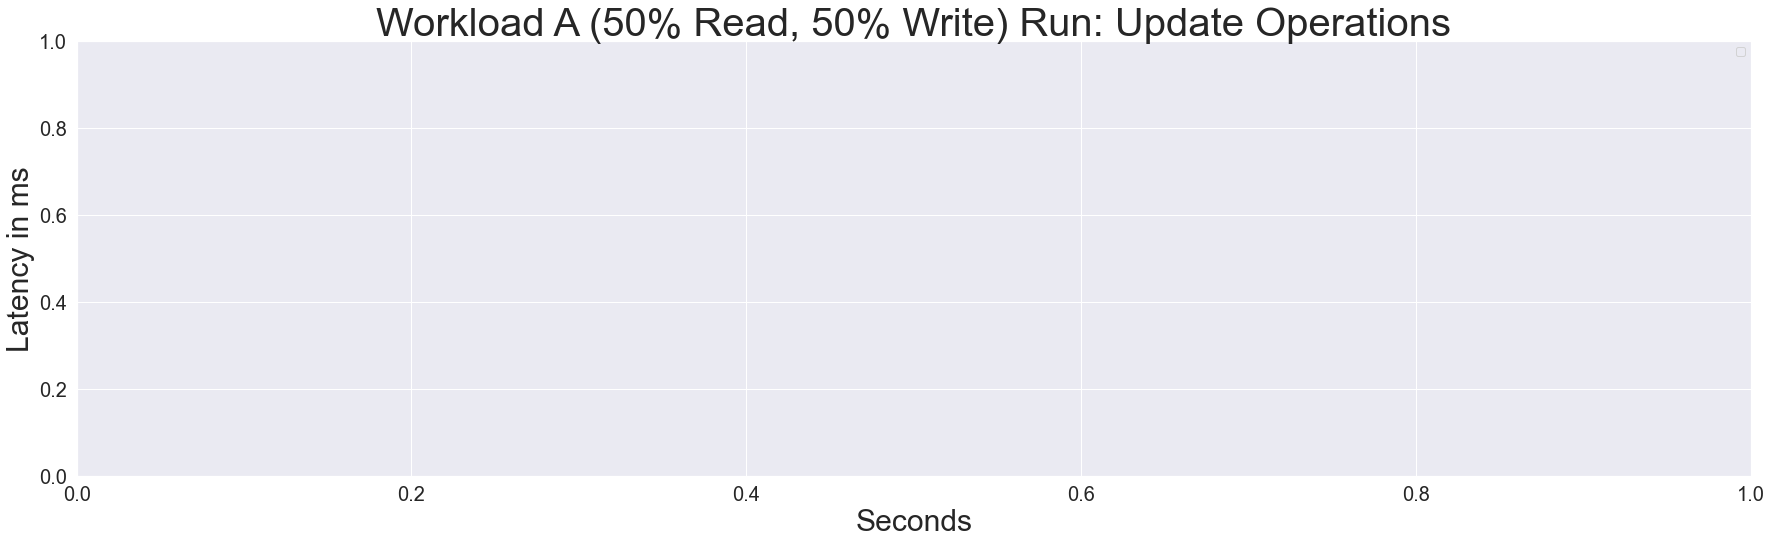

In [695]:
subchartA = dfAUpdate[['sent_sec', 'latency_ms']]
subchartB = dfBUpdate[['sent_sec', 'latency_ms']]

subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


fig, ax = plt.subplots()
title =  "Workload A (50% Read, 50% Write) Run: Update Operations"

line1 = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25, label=versionA)
line2 = sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25, label=versionB).set_title(title)

# Set x and y axis labels
ax.set_xlabel("Seconds");
ax.set_ylabel("Latency in ms");

ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontsize(20)

ax.title.set_fontsize(40)

# get the legend object
leg = ax.legend(handlelength=8)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
    

# change font size of every text in the legend
for text in leg.get_texts(): 
    text.set_fontsize(30)


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


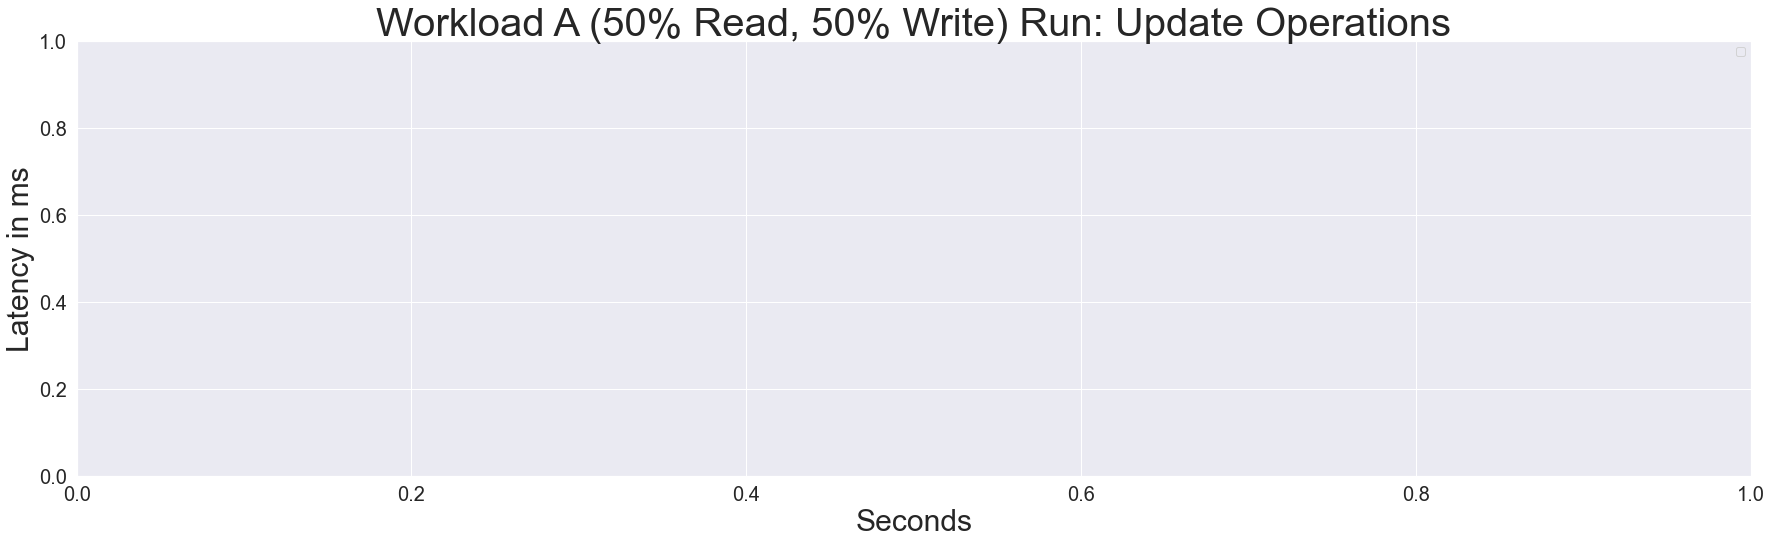

In [696]:
subchartA = dfAr3Raw[['sent_sec', 'latency_ms']]
subchartB = dfBr3Raw[['sent_sec', 'latency_ms']]

subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


fig, ax = plt.subplots()
title =  "Workload A (50% Read, 50% Write) Run: Update Operations"

line1 = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25, label=versionA)
line2 = sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25, label=versionB).set_title(title)

# Set x and y axis labels
ax.set_xlabel("Seconds");
ax.set_ylabel("Latency in ms");

ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)

for tick in ax.get_xticklabels():
    tick.set_fontsize(20)
    
for tick in ax.get_yticklabels(): 
    tick.set_fontsize(20)

ax.title.set_fontsize(40)

# get the legend object
leg = ax.legend(handlelength=8)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
    

# change font size of every text in the legend
for text in leg.get_texts(): 
    text.set_fontsize(30)


plt.show()

In [697]:
dfAUpdate.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [698]:
dfBUpdate.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [699]:
dfARead.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,4.420820e+05,4.420820e+05,4.420820e+05,442082.000000,4.420820e+05,4.420820e+05,442082.000000
mean,5.771004e+05,2.854151e+12,2.854162e+12,10.855120,2.854151e+06,2.854162e+06,405.301911
std,3.503854e+05,1.156365e+11,1.156361e+11,27.365490,1.156365e+05,1.156361e+05,115.636549
min,5.200400e+04,2.648851e+12,2.648853e+12,0.641453,2.648851e+06,2.648853e+06,200.001646
25%,3.662372e+05,2.755353e+12,2.755365e+12,1.315714,2.755353e+06,2.755365e+06,306.503116
50%,4.781945e+05,2.855945e+12,2.855976e+12,2.067485,2.855945e+06,2.855976e+06,407.095229
75%,7.885035e+05,2.955204e+12,2.955218e+12,4.289963,2.955204e+06,2.955218e+06,506.354382
max,1.102131e+06,3.048848e+12,3.048921e+12,1700.572357,3.048848e+06,3.048921e+06,599.998635


In [700]:
dfBRead.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,4.273180e+05,4.273180e+05,4.273180e+05,427318.000000,4.273180e+05,4.273180e+05,427318.000000
mean,5.662925e+05,2.854061e+12,2.854072e+12,11.229651,2.854061e+06,2.854072e+06,405.211663
std,3.509791e+05,1.155734e+11,1.155729e+11,27.644067,1.155734e+05,1.155729e+05,115.573414
min,4.313400e+04,2.648850e+12,2.648851e+12,0.668848,2.648850e+06,2.648851e+06,200.000362
25%,3.566308e+05,2.754775e+12,2.754782e+12,1.340276,2.754775e+06,2.754782e+06,305.925650
50%,4.646375e+05,2.855615e+12,2.855635e+12,2.147279,2.855615e+06,2.855635e+06,406.765030
75%,9.815502e+05,2.955000e+12,2.955005e+12,4.590650,2.955000e+06,2.955005e+06,506.150421
max,1.089434e+06,3.048849e+12,3.048923e+12,405.675215,3.048849e+06,3.048923e+06,599.999585
